# Homework UFOs - Συντεταγμένες

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import datetime

## Τώρα που μάθαμε να φτιάχνουμε χάρτες, το μόνο που μας λείπει είναι οι συντεταγμένες, τι οποίες ...ίσως και να μπορούμε να πάρουμε από κάπου αλλού! Π.χ. από το Google Maps!

Ας ξανακάνουμε το dataframe λεξικό και ας ζητήσουμε από το Google maps να μας δώσει πληροφορίες για τη διεύθυνση Pinon Hills.

In [16]:
df_ufo= pd.read_csv("ufos_2019.csv") # βάλτε το path για το δικό σας csv

In [17]:
df_ufo.dtypes

City       object
Date       object
Shape      object
State      object
Summary    object
dtype: object

In [18]:
df_ufo.head()

,City,Date,Shape,State,Summary
0,Palmdale,4/8/19 04:15,Circle,CA,"Driving N bound, 14 fwy, just about at the Aqu..."
1,Nashville,4/7/19 22:00,Disk,TN,((HOAX??))Very beautiful disc shaped object ap...
2,Las Vegas,4/7/19 20:25,Light,NV,A light caught my attention.
3,Harrisburg,4/7/19 20:00,Light,MO,I looked at the stars like I usually do. Then ...
4,Mary Esther,4/7/19 19:00,Light,FL,Green light pursued by several unmarked helico...


In [19]:
#φτιάχνουμε μια νέα στήλη με το έτος που ίσως μας χρειαστεί στα γραφήματά μας

import re

year = df_ufo['Date'].str.extract('\d{1,2}/\d{1,2}/(\d{2,4}) \d{1,2}:\d{1,2}')
df_ufo['Υear'] = df_ufo['Date'].str.extract('\d{1,2}/\d{1,2}/(\d{2,4}) \d{1,2}:\d{1,2}')
df_ufo.tail(3)

,City,Date,Shape,State,Summary,Υear
3272,Milford,3/22/92 21:30,Unknown,MA,"Low flying, very bright and flashing (flashed ...",92
3273,Beaumont/Sour Lake,3/22/92 18:30,Unknown,TX,It was a huge craft with several lights rotati...,92
3274,Leirfjord (over) (Norway),3/15/92 23:00,Flash,NaN,"single flashing light, suddenly hundreds or th...",92


In [9]:
dictionary = df_ufo.to_dict(orient="records")

In [10]:
dictionary[0:2]

[{'City': 'Kingston',
  'Date': '7/14/17 12:15',
  'Shape': 'Cylinder',
  'State': 'ON',
  'Summary': 'Black S shaped spinning balloon hovers at noon, then takes off at a 45 degree angle back up into space within seconds.'},
 {'City': 'Pinon Hills',
  'Date': '7/14/17 01:30',
  'Shape': 'Other',
  'State': 'CA',
  'Summary': 'Riding my quad on a dirt road, when I noticed the SW sky a bright blue star over the San Bernardino Mtns just W of Wright'}]

In [12]:
#εισάγουμε τη βιβλιοθήκη με την οποία ζητάμε πράγματα από το ίντερνετ
import requests

## Πηγαίνετε εδώ και φτιάξτε ένα API KEY το οποίο θα είναι ΜΟΝΟ δικό σας και δεν θα το δίνετε σε κανέναν!!! Ο αριθμός των συντεταγμένων που σας επιτρέπει να πάρετε δωρεάν είναι συγκεκριμένος, οπότε φτιάξτε τον χάρτη σας ανάλογα.

https://developers.google.com/maps/documentation/javascript/get-api-key

In [28]:
api_key = 'yourAPikey' #γράψτε εδώ το APIkey σας
url = 'https://maps.googleapis.com/maps/api/geocode/json'
keys = {'address': 'Pinon Hills', 'key': api_key}
r = requests.get(url,params=keys)

In [29]:
result_dic = r.json()

In [30]:
result_dic

{'results': [{'address_components': [{'long_name': 'Pinon Hills',
     'short_name': 'Pinon Hills',
     'types': ['locality', 'political']},
    {'long_name': 'San Bernardino County',
     'short_name': 'San Bernardino County',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'California',
     'short_name': 'CA',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'United States',
     'short_name': 'US',
     'types': ['country', 'political']}],
   'formatted_address': 'Pinon Hills, CA, USA',
   'geometry': {'bounds': {'northeast': {'lat': 34.5063339,
      'lng': -117.569309},
     'southwest': {'lat': 34.38283, 'lng': -117.660066}},
    'location': {'lat': 34.433237, 'lng': -117.6467917},
    'location_type': 'APPROXIMATE',
    'viewport': {'northeast': {'lat': 34.5063339, 'lng': -117.569309},
     'southwest': {'lat': 34.38283, 'lng': -117.660066}}},
   'place_id': 'ChIJS86fDY1pw4ARhzGQ3kCN4r8',
   'types': ['locality', 'po

In [31]:
result_dic['results']

[{'address_components': [{'long_name': 'Pinon Hills',
    'short_name': 'Pinon Hills',
    'types': ['locality', 'political']},
   {'long_name': 'San Bernardino County',
    'short_name': 'San Bernardino County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'California',
    'short_name': 'CA',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']}],
  'formatted_address': 'Pinon Hills, CA, USA',
  'geometry': {'bounds': {'northeast': {'lat': 34.5063339, 'lng': -117.569309},
    'southwest': {'lat': 34.38283, 'lng': -117.660066}},
   'location': {'lat': 34.433237, 'lng': -117.6467917},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': 34.5063339, 'lng': -117.569309},
    'southwest': {'lat': 34.38283, 'lng': -117.660066}}},
  'place_id': 'ChIJS86fDY1pw4ARhzGQ3kCN4r8',
  'types': ['locality', 'political']}]

In [36]:
result_dic['results'][0]['geometry']['location']['lat']

34.433237

## Πάμε να φτιάξουμε τη λούπα με την οποία θα πάρουμε για κάθε τοποθεσία τη γεωγραφική της θέση!

In [41]:
import requests

api_key = 'youAPIkey' #γράψτε εδώ το APIkey σας
result = []
for i in dictionary:
    a = i['City']
    url = 'https://maps.googleapis.com/maps/api/geocode/json'
    keys = {'address': a , 'key': api_key}
    r = requests.get(url,params=keys)
    result_dic = r.json()
    print(type(result_dic['results']))
    print(len(result_dic['results']))
    if len(result_dic['results']) == 0:
        continue
    i['lat'] = result_dic['results'][0]['geometry']['location']['lat']
    i['lng'] = result_dic['results'][0]['geometry']['location']['lng']
    print(i['City'], " LAT: ", i['lat'], " LONG: ", i['lng'])

<class 'list'>
4
Kingston  LAT:  41.9270367  LONG:  -73.9973608
<class 'list'>
1
Pinon Hills  LAT:  34.433237  LONG:  -117.6467917
<class 'list'>
1
Wappingers Falls  LAT:  41.5964825  LONG:  -73.91096999999999
<class 'list'>
1
Lebanon  LAT:  33.854721  LONG:  35.862285
<class 'list'>
1
Oak Ridge  LAT:  36.0103561  LONG:  -84.26964490000002
<class 'list'>
1
Charlotte  LAT:  35.2270869  LONG:  -80.8431267
<class 'list'>
1
Morehead City  LAT:  34.7229391  LONG:  -76.7260436
<class 'list'>
1
San Gabriel  LAT:  34.09611110000001  LONG:  -118.1058333
<class 'list'>
1
Lawrenceville  LAT:  33.9562149  LONG:  -83.9879625
<class 'list'>
1
McKinney  LAT:  33.1972465  LONG:  -96.6397822
<class 'list'>
1
Takoma Park  LAT:  38.9778882  LONG:  -77.0074765
<class 'list'>
1
Marietta  LAT:  33.95260200000001  LONG:  -84.5499327
<class 'list'>
1
Weston  LAT:  26.1003654  LONG:  -80.3997748
<class 'list'>
1
Rancho Cucamonga  LAT:  34.10639889999999  LONG:  -117.5931084
<class 'list'>
7
Carlisle  LAT:  40.

<class 'list'>
1
Reston  LAT:  38.9586307  LONG:  -77.35700279999999
<class 'list'>
1
Denver  LAT:  39.7392358  LONG:  -104.990251
<class 'list'>
1
Lexington  LAT:  38.0405837  LONG:  -84.5037164
<class 'list'>
1
Larmont  LAT:  -33.8755623  LONG:  151.2228384
<class 'list'>
1
Morristown  LAT:  40.79676670000001  LONG:  -74.4815438
<class 'list'>
1
Butte  LAT:  46.0038232  LONG:  -112.5347776
<class 'list'>
1
Lexington  LAT:  38.0405837  LONG:  -84.5037164
<class 'list'>
6
Prospect  LAT:  33.6984674  LONG:  -117.7244722
<class 'list'>
1
Versailles  LAT:  48.8048649  LONG:  2.1203554
<class 'list'>
1
Buffalo  LAT:  42.88644679999999  LONG:  -78.8783689
<class 'list'>
1
Montebello  LAT:  34.0165053  LONG:  -118.1137535
<class 'list'>
1
Franklin Square  LAT:  39.9558087  LONG:  -75.15041099999999
<class 'list'>
1
New York City (Queens)(Hollis)  LAT:  40.7112203  LONG:  -73.762495
<class 'list'>
1
Garden City Beach  LAT:  33.5929472  LONG:  -79.0086464
<class 'list'>
1
Woodinville  LAT:  47

<class 'list'>
1
Sun Prairie  LAT:  43.1836046  LONG:  -89.2137254
<class 'list'>
1
Hendersonville  LAT:  35.3187279  LONG:  -82.4609528
<class 'list'>
1
Mastic Beach  LAT:  40.7667655  LONG:  -72.85204759999999
<class 'list'>
1
Newport News  LAT:  37.0870821  LONG:  -76.4730122
<class 'list'>
1
Portland  LAT:  45.5230622  LONG:  -122.6764816
<class 'list'>
1
Portland  LAT:  45.5230622  LONG:  -122.6764816
<class 'list'>
1
Nampa  LAT:  43.5407172  LONG:  -116.5634624
<class 'list'>
1
Fort Oglethorpe  LAT:  34.9489645  LONG:  -85.2569
<class 'list'>
1
Trimont  LAT:  43.7621774  LONG:  -94.7072
<class 'list'>
1
East Norwich  LAT:  40.8467657  LONG:  -73.53512450000001
<class 'list'>
2
Duluth  LAT:  46.78667189999999  LONG:  -92.1004852
<class 'list'>
1
Miamiville  LAT:  39.212464  LONG:  -84.2999577
<class 'list'>
2
Bear  LAT:  35.2691728  LONG:  -95.4888568
<class 'list'>
1
Casa Grande  LAT:  32.9110027  LONG:  -111.7733902
<class 'list'>
1
Soap Lake  LAT:  47.389307  LONG:  -119.490591

<class 'list'>
1
Binh Duong (Vietnam)  LAT:  11.3254024  LONG:  106.477017
<class 'list'>
1
Chiang Rai (Thailand)  LAT:  19.9104798  LONG:  99.840576
<class 'list'>
1
Muncie  LAT:  40.1933767  LONG:  -85.3863599
<class 'list'>
1
Ferrum  LAT:  36.9229159  LONG:  -80.01337120000001
<class 'list'>
1
Axton  LAT:  36.659582  LONG:  -79.711978
<class 'list'>
1
Panama City (Panama)  LAT:  8.9823792  LONG:  -79.51986959999999
<class 'list'>
1
Waldport  LAT:  44.426786  LONG:  -124.0687302
<class 'list'>
1
Danville  LAT:  37.8215929  LONG:  -121.9999606
<class 'list'>
1
Vale do logo (Portugal)  LAT:  37.0593757  LONG:  -8.0586326
<class 'list'>
1
Yosemite National Park  LAT:  37.8651011  LONG:  -119.5383294
<class 'list'>
1
Sams Valley  LAT:  42.4915124  LONG:  -122.9753242
<class 'list'>
1
Wednesbury (UK/England)  LAT:  52.552888  LONG:  -2.02208
<class 'list'>
1
St. Peters  LAT:  38.7874699  LONG:  -90.6298922
<class 'list'>
1
Bend  LAT:  44.0581728  LONG:  -121.3153096
<class 'list'>
1
Dunca

<class 'list'>
1
Hebron  LAT:  31.532569  LONG:  35.09982600000001
<class 'list'>
1
Cherokee  LAT:  42.7496413  LONG:  -95.55154309999999
<class 'list'>
1
Pleasanton  LAT:  37.6624312  LONG:  -121.8746789
<class 'list'>
1
Eau Claire  LAT:  44.811349  LONG:  -91.4984941
<class 'list'>
1
Morehead  LAT:  38.1839705  LONG:  -83.4326841
<class 'list'>
1
Boulder  LAT:  40.0149856  LONG:  -105.2705456
<class 'list'>
1
Leota  LAT:  40.7551418  LONG:  -73.990072
<class 'list'>
1
Atoka  LAT:  34.3859257  LONG:  -96.12832519999999
<class 'list'>
2
Cimarron  LAT:  36.5108691  LONG:  -104.9158341
<class 'list'>
1
Anaheim  LAT:  33.8365932  LONG:  -117.9143012
<class 'list'>
2
Salem  LAT:  42.51954  LONG:  -70.8967155
<class 'list'>
1
Park City  LAT:  40.6460622  LONG:  -111.4979729
<class 'list'>
1
Round Lake  LAT:  42.353355  LONG:  -88.0934145
<class 'list'>
1
Ballinger  LAT:  39.950188  LONG:  -75.15508799999999
<class 'list'>
1
Derry  LAT:  54.9966124  LONG:  -7.3085748
<class 'list'>
1
New Cum

<class 'list'>
1
Buffalo  LAT:  42.88644679999999  LONG:  -78.8783689
<class 'list'>
1
Sugar Hill  LAT:  34.1076591  LONG:  -84.0362462
<class 'list'>
1
Phoenix  LAT:  33.4483771  LONG:  -112.0740373
<class 'list'>
1
Colorado Springs  LAT:  38.8338816  LONG:  -104.8213634
<class 'list'>
1
Topeka  LAT:  39.0558235  LONG:  -95.68901849999999
<class 'list'>
1
Monroe  LAT:  41.9164343  LONG:  -83.3977101
<class 'list'>
1
Kewanee  LAT:  41.2455927  LONG:  -89.9248303
<class 'list'>
1
Northvale  LAT:  41.0064864  LONG:  -73.9490258
<class 'list'>
1
Wonder Lake  LAT:  42.3852983  LONG:  -88.3473126
<class 'list'>
1
Seattle  LAT:  47.6062095  LONG:  -122.3320708
<class 'list'>
1
Oak Lawn  LAT:  41.719978  LONG:  -87.7479528
<class 'list'>
1
Auburn  LAT:  32.5933574  LONG:  -85.4951663
<class 'list'>
3
Eminence  LAT:  38.3700683  LONG:  -85.1805105
<class 'list'>
1
El Mirage  LAT:  33.6130942  LONG:  -112.3246042
<class 'list'>
1
Malibu  LAT:  34.0259216  LONG:  -118.7797571
<class 'list'>
1
Ca

<class 'list'>
1
Spokane Valley  LAT:  47.6732281  LONG:  -117.2393748
<class 'list'>
1
Wilmington  LAT:  34.2257255  LONG:  -77.9447102
<class 'list'>
1
Claremore  LAT:  36.3125963  LONG:  -95.61609
<class 'list'>
1
Des Plaines  LAT:  42.0333623  LONG:  -87.88339909999999
<class 'list'>
1
Edwardsville  LAT:  38.8114364  LONG:  -89.95315699999999
<class 'list'>
1
Lutton (UK/England)  LAT:  52.809452  LONG:  0.124674
<class 'list'>
1
Tucson  LAT:  32.2217429  LONG:  -110.926479
<class 'list'>
1
New Milford  LAT:  41.5770433  LONG:  -73.4085463
<class 'list'>
1
Wilmington  LAT:  34.2257255  LONG:  -77.9447102
<class 'list'>
1
White Marsh  LAT:  39.3756524  LONG:  -76.4682287
<class 'list'>
1
Hoboken  LAT:  40.7439905  LONG:  -74.0323626
<class 'list'>
1
Kiev (Ukraine)  LAT:  50.4501  LONG:  30.5234
<class 'list'>
1
Milton  LAT:  43.5182991  LONG:  -79.8774042
<class 'list'>
1
Pownal  LAT:  43.9133191  LONG:  -70.1803764
<class 'list'>
1
Salisbury  LAT:  38.3606736  LONG:  -75.5993692
<cl

<class 'list'>
1
Brooklyn Park  LAT:  45.0941315  LONG:  -93.3563405
<class 'list'>
2
Harrington  LAT:  38.9237244  LONG:  -75.5777033
<class 'list'>
1
Auburn  LAT:  32.5933574  LONG:  -85.4951663
<class 'list'>
1
Auburn  LAT:  32.5933574  LONG:  -85.4951663
<class 'list'>
1
Northville  LAT:  42.4311464  LONG:  -83.4832692
<class 'list'>
1
Cape Coral  LAT:  26.5628537  LONG:  -81.9495331
<class 'list'>
1
Atlanta  LAT:  33.7489954  LONG:  -84.3879824
<class 'list'>
1
Atlanta  LAT:  33.7489954  LONG:  -84.3879824
<class 'list'>
1
Whitby (Canada)  LAT:  43.8975446  LONG:  -78.94293290000002
<class 'list'>
1
Durham  LAT:  35.9940329  LONG:  -78.898619
<class 'list'>
1
Ayia (Greece)  LAT:  39.7190695  LONG:  22.7586904
<class 'list'>
1
Clearwater/Palm Harbor  LAT:  27.9758115  LONG:  -82.75178629999999
<class 'list'>
1
Lake St. Louis  LAT:  38.7809384  LONG:  -90.78836040000002
<class 'list'>
1
Greenville  LAT:  34.85261759999999  LONG:  -82.3940104
<class 'list'>
1
Wylie  LAT:  33.0151201 

<class 'list'>
1
West Kelowna (Canada)  LAT:  49.863612  LONG:  -119.5644584
<class 'list'>
1
Armadale (Australia)  LAT:  -32.153  LONG:  116.015
<class 'list'>
1
Tulsa  LAT:  36.1539816  LONG:  -95.99277500000001
<class 'list'>
1
Tacoma  LAT:  47.2528768  LONG:  -122.4442906
<class 'list'>
1
Gambrills  LAT:  39.0670456  LONG:  -76.6654513
<class 'list'>
1
Albuquerque  LAT:  35.0853336  LONG:  -106.6055534
<class 'list'>
1
Mossyrock  LAT:  46.5295517  LONG:  -122.4851112
<class 'list'>
1
Everett  LAT:  47.9789848  LONG:  -122.2020794
<class 'list'>
1
Orangeville (Canada)  LAT:  43.9199788  LONG:  -80.0943113
<class 'list'>
1
Bradenton  LAT:  27.4989278  LONG:  -82.5748194
<class 'list'>
1
Beattyville  LAT:  37.5717532  LONG:  -83.7068597
<class 'list'>
1
Dumaguete (Philippines)  LAT:  9.3068402  LONG:  123.3054467
<class 'list'>
1
Rochester  LAT:  43.16103  LONG:  -77.6109219
<class 'list'>
1
Indian Reservation on way to Barona Casino  LAT:  32.9394452  LONG:  -116.8730451
<class 'list

<class 'list'>
1
Albuquerque  LAT:  35.0853336  LONG:  -106.6055534
<class 'list'>
1
Los Angeles  LAT:  34.0522342  LONG:  -118.2436849
<class 'list'>
2
Bermuda/Florida coast (between)  LAT:  27.7349357  LONG:  -82.6902977
<class 'list'>
1
New York City (upper West Side)  LAT:  40.7870106  LONG:  -73.9753676
<class 'list'>
1
Les Cayes (Haiti)  LAT:  18.2042851  LONG:  -73.7536695
<class 'list'>
1
Los Angeles  LAT:  34.0522342  LONG:  -118.2436849
<class 'list'>
1
Louisville  LAT:  38.2526647  LONG:  -85.7584557
<class 'list'>
1
Sherman Oaks  LAT:  34.1489719  LONG:  -118.451357
<class 'list'>
6
Columbia  LAT:  38.9517053  LONG:  -92.3340724
<class 'list'>
10
Grant  LAT:  47.1981147  LONG:  -119.3732456
<class 'list'>
1
Slidell  LAT:  30.2751945  LONG:  -89.78117449999999
<class 'list'>
1
Rockville  LAT:  39.0839973  LONG:  -77.1527578
<class 'list'>
1
Sugarland  LAT:  29.6336358  LONG:  -95.6004476
<class 'list'>
1
Portsmouth  LAT:  43.0717552  LONG:  -70.7625532
<class 'list'>
1
Ropar

<class 'list'>
1
County Durham (UK/England)  LAT:  54.7294099  LONG:  -1.8811598
<class 'list'>
1
Nashua  LAT:  42.7653662  LONG:  -71.46756599999999
<class 'list'>
1
Calexico  LAT:  32.6789476  LONG:  -115.4988834
<class 'list'>
5
Davenport  LAT:  41.5236437  LONG:  -90.5776367
<class 'list'>
5
Davenport  LAT:  41.5236437  LONG:  -90.5776367
<class 'list'>
1
Indio  LAT:  33.7205771  LONG:  -116.2155619
<class 'list'>
1
Mission Viejo  LAT:  33.5968913  LONG:  -117.6581562
<class 'list'>
1
Whittier  LAT:  33.9791793  LONG:  -118.032844
<class 'list'>
1
Brawley  LAT:  32.9786566  LONG:  -115.530267
<class 'list'>
1
Austin  LAT:  30.267153  LONG:  -97.7430608
<class 'list'>
1
Pacific Beach  LAT:  32.8024577  LONG:  -117.2355851
<class 'list'>
1
South Kingstown  LAT:  41.4475686  LONG:  -71.524667
<class 'list'>
1
San Marcos  LAT:  29.8832749  LONG:  -97.9413941
<class 'list'>
1
Wichita  LAT:  37.68717609999999  LONG:  -97.33005299999999
<class 'list'>
1
Colorado (southeast part)  LAT:  38

<class 'list'>
2
Orleans  LAT:  41.7898354  LONG:  -69.9897323
<class 'list'>
1
Indian Shores  LAT:  27.862801  LONG:  -82.84843730000001
<class 'list'>
1
Sevierville  LAT:  35.8681455  LONG:  -83.56183500000002
<class 'list'>
5
Allendale  LAT:  41.0414857  LONG:  -74.129032
<class 'list'>
0
<class 'list'>
1
Sonoma  LAT:  38.291859  LONG:  -122.4580356
<class 'list'>
3
Hernandez  LAT:  27.3288542  LONG:  -99.5022286
<class 'list'>
2
Largo  LAT:  27.9094665  LONG:  -82.7873244
<class 'list'>
2
Orange  LAT:  33.7879139  LONG:  -117.8531007
<class 'list'>
1
Canby  LAT:  45.2622655  LONG:  -122.6921006
<class 'list'>
1
Wrightwood  LAT:  34.3608341  LONG:  -117.6333884
<class 'list'>
1
Wyoming  LAT:  43.0759678  LONG:  -107.2902839
<class 'list'>
10
Boulevard  LAT:  37.2602611  LONG:  -77.41144179999999
<class 'list'>
5
Brighton  LAT:  39.9852617  LONG:  -104.8205283
<class 'list'>
1
Crescent  LAT:  32.7942028  LONG:  -96.804205
<class 'list'>
1
Madison  LAT:  43.0730517  LONG:  -89.4012302

<class 'list'>
1
Sebastian  LAT:  35.2260397  LONG:  -94.315422
<class 'list'>
2
Lantana  LAT:  26.5867358  LONG:  -80.05198589999999
<class 'list'>
1
Acworth  LAT:  34.0659329  LONG:  -84.6768796
<class 'list'>
2
Lantana  LAT:  26.5867358  LONG:  -80.05198589999999
<class 'list'>
1
Port Saint Lucie  LAT:  27.2730492  LONG:  -80.3582261
<class 'list'>
1
Bryant  LAT:  34.5959265  LONG:  -92.48904689999999
<class 'list'>
1
Bartlett  LAT:  41.9950276  LONG:  -88.1856301
<class 'list'>
1
Wasilla  LAT:  61.5813889  LONG:  -149.4394444
<class 'list'>
1
Kansas City  LAT:  39.0997265  LONG:  -94.5785667
<class 'list'>
3
Grandview  LAT:  46.2509653  LONG:  -119.9017049
<class 'list'>
1
Kansas City  LAT:  39.0997265  LONG:  -94.5785667
<class 'list'>
1
Mandeville  LAT:  30.35825059999999  LONG:  -90.06563109999999
<class 'list'>
5
Montague  LAT:  42.5355277  LONG:  -72.5353437
<class 'list'>
4
Franklin  LAT:  35.9250637  LONG:  -86.8688899
<class 'list'>
1
Portsmouth  LAT:  43.0717552  LONG:  -7

<class 'list'>
1
Belvidere  LAT:  42.2639098  LONG:  -88.84426739999999
<class 'list'>
1
Piney Flats  LAT:  36.4192723  LONG:  -82.3048542
<class 'list'>
1
Gulf Shores  LAT:  30.2460361  LONG:  -87.70081929999999
<class 'list'>
7
Riverdale  LAT:  33.5726113  LONG:  -84.4132594
<class 'list'>
1
Ypsilanti  LAT:  42.2411499  LONG:  -83.61299389999999
<class 'list'>
1
Phoenix  LAT:  33.4483771  LONG:  -112.0740373
<class 'list'>
1
Gray Court  LAT:  34.6081774  LONG:  -82.113438
<class 'list'>
1
Gray Court  LAT:  34.6081774  LONG:  -82.113438
<class 'list'>
1
Princeton  LAT:  40.3439888  LONG:  -74.6514481
<class 'list'>
2
Adel  LAT:  31.1371358  LONG:  -83.4234936
<class 'list'>
1
Philadelphia  LAT:  39.9525839  LONG:  -75.1652215
<class 'list'>
1
San Angelo  LAT:  31.4637723  LONG:  -100.4370375
<class 'list'>
1
Summerville  LAT:  33.0185039  LONG:  -80.17564809999999
<class 'list'>
1
Lexington  LAT:  38.0405837  LONG:  -84.5037164
<class 'list'>
1
Fort Worth  LAT:  32.7554883  LONG:  -97

<class 'list'>
0
<class 'list'>
1
Florence  LAT:  43.7695604  LONG:  11.2558136
<class 'list'>
1
Longmont  LAT:  40.1672068  LONG:  -105.1019275
<class 'list'>
1
Long Beach  LAT:  33.7700504  LONG:  -118.1937395
<class 'list'>
1
Mesa  LAT:  33.4151843  LONG:  -111.8314724
<class 'list'>
1
Delray Beach  LAT:  26.4614625  LONG:  -80.0728201
<class 'list'>
1
Broomfield  LAT:  39.9205411  LONG:  -105.0866504
<class 'list'>
1
Elk Grove  LAT:  38.4087993  LONG:  -121.3716178
<class 'list'>
2
Fall Creek  LAT:  32.9505764  LONG:  -97.0771604
<class 'list'>
1
Beacon  LAT:  41.5048158  LONG:  -73.9695832
<class 'list'>
1
Omaha  LAT:  41.2523634  LONG:  -95.99798829999999
<class 'list'>
1
winter harbor  LAT:  44.3947873  LONG:  -68.0830278
<class 'list'>
1
Nampa  LAT:  43.5407172  LONG:  -116.5634624
<class 'list'>
1
Wapwallopen  LAT:  41.0715209  LONG:  -76.13054799999999
<class 'list'>
1
Bridgeport  LAT:  41.1865478  LONG:  -73.19517669999999
<class 'list'>
1
Bridgeport  LAT:  41.1865478  LONG:

<class 'list'>
1
NSL ((North Salt Lake??))  LAT:  40.843932  LONG:  -111.909747
<class 'list'>
1
Raymore  LAT:  38.801953  LONG:  -94.4527294
<class 'list'>
1
Gettysburg  LAT:  39.8309293  LONG:  -77.2310955
<class 'list'>
1
Tacoma  LAT:  47.2528768  LONG:  -122.4442906
<class 'list'>
1
Millvale  LAT:  40.480069  LONG:  -79.9783862
<class 'list'>
1
Billings  LAT:  45.7832856  LONG:  -108.5006904
<class 'list'>
6
Osceola  LAT:  45.3205199  LONG:  -92.7049303
<class 'list'>
0
<class 'list'>
1
Irving  LAT:  32.8140177  LONG:  -96.9488945
<class 'list'>
0
<class 'list'>
1
Fairbanks  LAT:  64.8377778  LONG:  -147.7163889
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<c

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
1
Greensboro  LAT:  36.0726354  LONG:  -79.7919754
<class 'list'>
0
<class 'list'>
0
<class 'list'>
1
Belfast  LAT:  54.59728500000001  LONG:  -5.93012
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
1
Los Angeles  LAT:  34.0522342  LONG:  -118.2436849
<class 'list'>
0
<class 'list'>
0
<class 'list'>
1
Salinas  LAT:  36.6777372  LONG:  -121.6555013
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<cla

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>
0
<class 'list'>

In [43]:
pd.DataFrame(dictionary)

,City,Date,Shape,State,Summary,lat,lng
0,Kingston,7/14/17 12:15,Cylinder,ON,Black S shaped spinning balloon hovers at noon...,41.927037,-73.997361
1,Pinon Hills,7/14/17 01:30,Other,CA,"Riding my quad on a dirt road, when I noticed ...",34.433237,-117.646792
2,Wappingers Falls,7/13/17 23:00,Triangle,NY,It seemed to be a boomerang or triangular shap...,41.596483,-73.910970
3,Lebanon,7/13/17 22:44,Sphere,OR,Bright red or orange spherical object. First s...,33.854721,35.862285
4,Oak Ridge,7/13/17 22:02,Light,TN,"Bright green light ball flying circular, oval ...",36.010356,-84.269645
5,Charlotte,7/13/17 21:30,Formation,NC,"Flock formation of unidentified craft, appeari...",35.227087,-80.843127
6,Morehead City,7/13/17 21:00,Circle,NC,"Still, orange light over Morehead City.",34.722939,-76.726044
7,San Gabriel,7/13/17 20:45,Sphere,CA,"Extremely fast right red liight, sphere in shape",34.096111,-118.105833
8,Lawrenceville,7/13/17 12:33,Fireball,GA,"White star-like object grew larger, dropped, d...",33.956215,-83.987962
9,McKinney,7/13/17 07:51,Sphere,TX,Red metallic sphere.,33.197246,-96.639782


In [44]:
ufo_geometry = pd.DataFrame(dictionary)

In [45]:
ufo_geometry.head()

,City,Date,Shape,State,Summary,lat,lng
0,Kingston,7/14/17 12:15,Cylinder,ON,Black S shaped spinning balloon hovers at noon...,41.927037,-73.997361
1,Pinon Hills,7/14/17 01:30,Other,CA,"Riding my quad on a dirt road, when I noticed ...",34.433237,-117.646792
2,Wappingers Falls,7/13/17 23:00,Triangle,NY,It seemed to be a boomerang or triangular shap...,41.596483,-73.910970
3,Lebanon,7/13/17 22:44,Sphere,OR,Bright red or orange spherical object. First s...,33.854721,35.862285
4,Oak Ridge,7/13/17 22:02,Light,TN,"Bright green light ball flying circular, oval ...",36.010356,-84.269645


## Ξανασώζουμε το πλήρες csv και προχωράμε στην ανάλυση

In [46]:
ufo_geometry.to_csv("ufo_geometry.csv", encoding = 'utf-8')

## Τώρα μπορείτε να φτιάξετε ένα χάρτη της επιλογής σας με το QGIS και να ανεβάσετε το κείμενο σας μαζί με τα γραφήματα και το χάρτη που θα φτιάξετε!

## Με τον παρακάτω τρόπο μπορούμε να κάνουμε export ένα γράφημα ως pdf για να το εισάγουμε σε άλλο λογισμικό μετά αν θέλουμε για περαιτέρω επεξεργασία. 

**σημειώση** για να είναι δυνατό το export πρέπει να έχετε εισάγει την κατάλληλη βιβλιοθήκη με import όπως κάναμε σε αυτό το notebook. Πηγαίνετε στην αρχή και ρίξτε μια ματιά. 

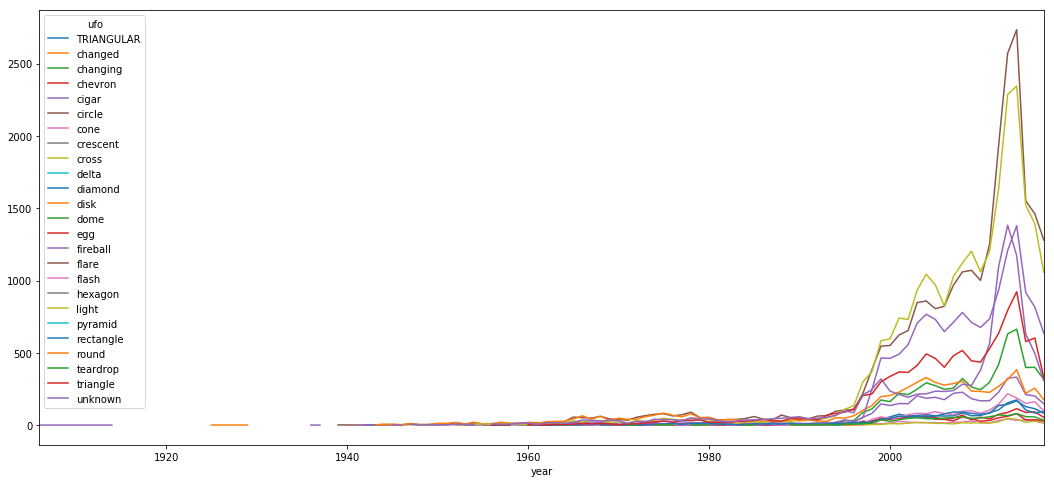

In [244]:
df_pivot.plot(figsize=(18,8))

plt.savefig("shapes.pdf") #αυτός είναι ο κώδικας για την εξαγωγή του γραφήματος ως εικόνα